# Imports and Prepare Data

In [1]:
import tensorflow as tf
import numpy as np  
import matplotlib.pyplot as plt
import os
import imageio
from random import randint


2024-11-24 17:55:22.234415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732458322.249909    7909 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732458322.254566    7909 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 17:55:22.270240: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load('../data/mnist/x_train.npy')
y_train = np.load('../data/mnist/y_train.npy')
x_test  = np.load('../data/mnist/x_test.npy')
y_test  = np.load('../data/mnist/y_test.npy')

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### predition function

In [12]:
def predict_test_data(model, show_image=True):
    ims_idx = []
    for i in range(10):
        x = randint(0, 9999)
        ims_idx.append(x)

    results = []
    msgs = []
    r = str()
    msg = ''

    for i in ims_idx:
        results.append(model.predict(x_test[i].reshape(1, 28, 28, 1)))

    for i in range(len(ims_idx)):
        if str(np.argmax(results[i])) == str(y_test[ims_idx[i]]):
            msg = "Correct " + str(np.argmax(results[i]))
            r += 'T '
        else:
            msg = "Wrong " + str(np.argmax(results[i])) + " - " + str(y_test[ims_idx[i]])
            r += 'F ' 

        msgs.append(msg)
        msg = ''
        
    print(r)
    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j][z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(x_test[ims_idx[i]].reshape(28, 28), cmap='binary')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()

    return r

def predict_real_data(model, show_image=True):
    ls = os.listdir('../img/')
    ims = [] 
    idx = []
    r = str()
    msgs = []

    for i in ls:
        if i.endswith('.png'):
            ims.append(imageio.imread('../img/' + i, mode='F'))  
            idx.append(i[0])

    for i in range(len(ims)):
        result = np.argmax(model.predict(ims[i].reshape(1, 28, 28, 1)))

        if str(result) == str(idx[i]):
            msg = "Correct " + str(result)
            r += 'T '
        else:
            msg = "Wrong " + str(result) + " - " + str(idx[i])
            r += 'F '

        msgs.append(msg)

    print(r)

    if show_image:
        fig, axs = plt.subplots(3, 3)
        j, z = 0, 0
        for i in range(9):
            axs[j, z].text(0, 0, msgs[i], bbox={'facecolor': 'white', 'pad': 1})
            axs[j][z].imshow(ims[i], cmap='grey')
            if z == 2:
                j += 1
                z = 0
            else:
                z += 1

        plt.show()
        
    return r

# RNN

### Create Model

In [4]:
PATH = '../saved_weights/RNN_model/' + 'rnn_simple.weights.h5'

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, activation='relu', input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

I0000 00:00:1732458324.627613    7909 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 727 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,386 (83.54 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [6]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


I0000 00:00:1732458326.377477    7977 service.cc:148] XLA service 0x7d21440040a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732458326.377496    7977 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-11-24 17:55:26.401527: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732458326.483187    7977 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-24 17:55:26.851774: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


 105/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2923 - loss: 1.9118

I0000 00:00:1732458327.213971    7977 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7534 - loss: 0.7332 - val_accuracy: 0.9399 - val_loss: 0.2030
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9372 - loss: 0.2160 - val_accuracy: 0.9594 - val_loss: 0.1446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9528 - loss: 0.1682 - val_accuracy: 0.9549 - val_loss: 0.1602
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9582 - loss: 0.1463 - val_accuracy: 0.9497 - val_loss: 0.1802
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1246 - val_accuracy: 0.9669 - val_loss: 0.1186


In [7]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9647 - loss: 0.1317


[0.1186467632651329, 0.9668999910354614]

### Save and Load

In [8]:
# save model
model.save_weights(PATH)

In [9]:
# load model 
model.load_weights(PATH)

### Predition

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
T T T F T T T T T T 


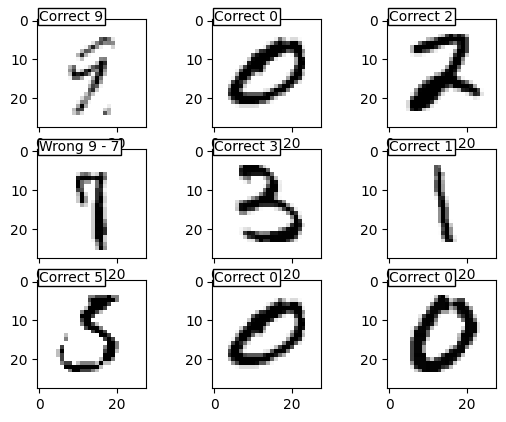

In [10]:
r = predict_test_data(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/tmp/ipykernel_7909/2023242906.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims.append(imageio.imread('../img/' + i, mode='F'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
F T F F F F F F F 


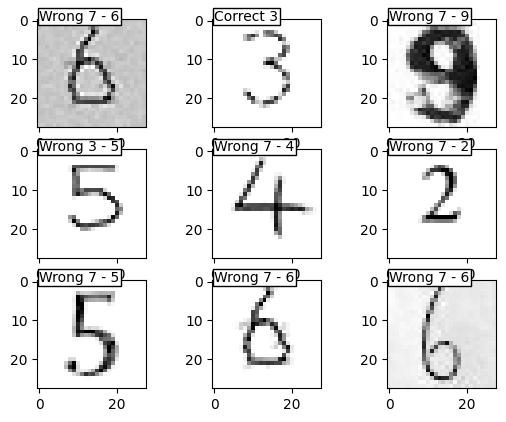

In [13]:
r = predict_real_data(model)

-------
# RNN 4Layer

In [14]:
PATH2 = '../saved_weights/RNN_model/' + 'rnn_simple2.weights.h5'

model2 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(512, activation='relu', input_shape=(28, 28), return_sequences=True),
    tf.keras.layers.SimpleRNN(256, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 28, 512)        │       276,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 28, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,426 (2.00 MB)

 Trainable params: 524,426 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8230 - loss: 0.5391 - val_accuracy: 0.9457 - val_loss: 0.1921
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9575 - loss: 0.1472 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9674 - loss: 0.1188 - val_accuracy: 0.9742 - val_loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9701 - loss: 0.1081 - val_accuracy: 0.9718 - val_loss: 0.1092
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9722 - loss: 0.0999 - val_accuracy: 0.9728 - val_loss: 0.1069


In [17]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1239


[0.10688389837741852, 0.9728000164031982]

### Save and Load

In [ ]:
model2.save_weights(PATH2)

In [18]:
model2.load_weights(PATH2)

/home/devhamidh/Desktop/projekt/NN_MNIST/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Predition

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
T T F T T T T T T F 


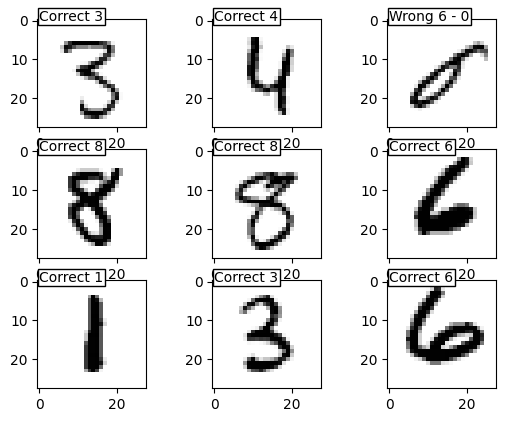

In [19]:
r = predict_test_data(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/tmp/ipykernel_7909/2023242906.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ims.append(imageio.imread('../img/' + i, mode='F'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
F T F F F F F F F 


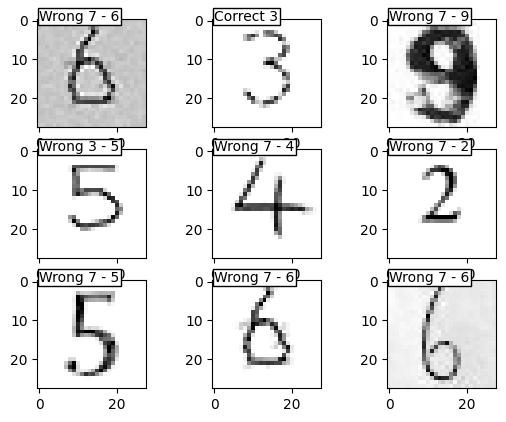

In [20]:
r = predict_real_data(model)